Part-1: Clustering

In [3]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import adjusted_mutual_info_score
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Q1 Reading the file as M(m*n) matrix

M=np.loadtxt("E:/ALL DEAKIN/T2_JUL_NOV_2019/MACHINE LEARNING_SIT720/Assignment1/Assessment-task-1/data/number4/digitData4.csv", dtype='i', delimiter=',')
print(M)

[[ 0  0  5 ...  0  0  0]
 [ 0  0  0 ...  0  0  1]
 [ 0  0  0 ...  9  0  2]
 ...
 [ 0  1 11 ...  0  0  7]
 [ 0  0  5 ...  0  0  4]
 [ 0  0  0 ...  0  0  6]]


In [5]:
#Understanding the size of M.The Output reveals it is a (1630*65) matrix Therefore here row m=1630 and column n=65

print(M.shape)

(1630, 65)


In [6]:
#Q1 creating an empty array X with 1630 rows and 64 columns (following the given m rows and n-1 column rule referring to M) 

X=np.empty((1630,64))
print(X)

[[2.2682356e-318 8.8364716e-316 0.0000000e+000 ... 0.0000000e+000
  0.0000000e+000 0.0000000e+000]
 [0.0000000e+000 0.0000000e+000 0.0000000e+000 ... 0.0000000e+000
  0.0000000e+000 0.0000000e+000]
 [0.0000000e+000 0.0000000e+000 0.0000000e+000 ... 0.0000000e+000
  0.0000000e+000 0.0000000e+000]
 ...
 [0.0000000e+000 0.0000000e+000 0.0000000e+000 ... 0.0000000e+000
  0.0000000e+000 0.0000000e+000]
 [0.0000000e+000 0.0000000e+000 0.0000000e+000 ... 0.0000000e+000
  0.0000000e+000 0.0000000e+000]
 [0.0000000e+000 0.0000000e+000 0.0000000e+000 ... 0.0000000e+000
  0.0000000e+000 0.0000000e+000]]


In [8]:
#Q1 Assigning all m rows and first n-1 columns of M into X utlizing slicing techniques

X=M[:,:-1]

print(X)

[[ 0  0  5 ...  0  0  0]
 [ 0  0  0 ... 10  0  0]
 [ 0  0  0 ... 16  9  0]
 ...
 [ 0  1 11 ...  0  0  0]
 [ 0  0  5 ...  0  0  0]
 [ 0  0  0 ... 12  0  0]]


In [9]:
#Q1 Creating a numpy vector trueLabels and assign n-th column of M into that.

trueLabels=M[:,-1]

print(trueLabels)

[0 1 2 ... 7 4 6]


In [10]:
#Q1 Dimensions of M,X and trueLabels.
print("Dimenson of M:",np.shape(M))
print("Dimenson of X:",np.shape(X))
print("Dimenson of trueLabels:",np.shape(trueLabels))

Dimenson of M: (1630, 65)
Dimenson of X: (1630, 64)
Dimenson of trueLabels: (1630,)


In [12]:
#Q2 performing kmeans. Here, 5 clusters has been used and Eucledian distance measurement is inbuilt with the function
kmeans = KMeans(init='k-means++', n_clusters=5)
k_cluster = kmeans.fit_predict(X)
print('Predicted Clusters',k_cluster[:5])

Predicted Clusters [4 0 2 1 3]


In [13]:
#Q2 Evaluating the performance with adjusted rand index and adjusted mutualinformation
#we know, the score of adjusted rand index typically is from 0 to 1, where more close to 1 means the better the clustering model 
#similarly in adjusted mutual information score, the more it is close to 1 the better the result as it measures the agreement 
#between truLabel and clusters.Here, none of the scores signaling a very good model of clustering.However AMI is better than ARI.  
print('Adjusted Random Index Score',round(adjusted_rand_score(trueLabels, k_cluster),2))
print('Adjusted Mutual Info Score ',round(adjusted_mutual_info_score(trueLabels, k_cluster),2))

Adjusted Random Index Score 0.36
Adjusted Mutual Info Score  0.46


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [14]:
#Q2 Reporting the clustering performance averaged over 50 random initializations of K-means
# prior to comparing clusters with trueLabels, the vector trueLabel needed to transfrom into array
#for adjusted rand index and mutual informatiom two seperate lists are created 
truelabels1=np.squeeze(np.asarray(trueLabels)) 

Adjusted_Rand_Index_list = []
Adjusted_Mutual_Information_list = []

In [15]:
for i in range (50):
    kmeans=KMeans(n_clusters=5)
    kmeans.fit(X)

    labels=kmeans.labels_
    centroid_1=kmeans.cluster_centers_


    truelabels1=np.squeeze(np.asarray(trueLabels))


    ARI=adjusted_rand_score(truelabels1, labels)
    AMI=adjusted_mutual_info_score(truelabels1,labels)
    Adjusted_Rand_Index_list = np.append(Adjusted_Rand_Index_list, ARI)
    Adjusted_Mutual_Information_list = np.append(Adjusted_Mutual_Information_list, AMI)
    
print(Adjusted_Rand_Index_list)
print(Adjusted_Mutual_Information_list)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use avera

C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use avera

[0.38941486 0.36104613 0.35882089 0.37998976 0.38752925 0.35600735
 0.35882846 0.32939251 0.35600735 0.36104613 0.36104613 0.35600735
 0.35600735 0.36151006 0.36104613 0.38772867 0.35621423 0.36019684
 0.36104613 0.35600735 0.36123538 0.35600735 0.39398947 0.35549367
 0.39398947 0.36104613 0.35985619 0.35705879 0.38837991 0.36008813
 0.39288001 0.38929635 0.35955632 0.35977907 0.35565897 0.35882089
 0.33279753 0.36104613 0.36090129 0.34785958 0.35600735 0.35549367
 0.36071877 0.35600735 0.36050767 0.34832095 0.35565897 0.38931668
 0.32573226 0.35956275]
[0.48667019 0.45815582 0.45529048 0.4532906  0.48518379 0.45161559
 0.4552841  0.43132575 0.45161559 0.45815582 0.45815582 0.45161559
 0.45161559 0.45900928 0.45815582 0.48561565 0.45211935 0.45707916
 0.45815582 0.45161559 0.45863872 0.45161559 0.49154505 0.45105106
 0.49154505 0.45815582 0.45664388 0.45282145 0.48605851 0.45733631
 0.49051531 0.4872425  0.45636518 0.45610001 0.45116363 0.45529048
 0.43354756 0.45815582 0.45811911 0.45

C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [16]:
#for 50 iteration, averaging has been done for adjusted rand index (ARI) and mutual information (AMI)
#here, the scores do not indicate a verty good clustering model since none of them are close to 1.
#So, the learning of the model needs to be enhanced for better performance.  
print('ARI:',round(np.average(Adjusted_Rand_Index_list),2))
print('AMI:',round(np.average(Adjusted_Mutual_Information_list),2))

ARI: 0.36
AMI: 0.46


In [ ]:
#Q3
# After a single run of K-means if the ARI is 0.7, then after 20 iterations for any number of clusters and dataset , 
# the averaged ARI is likely to be below 0.7. Because, the accumulated ARI in each iteration will be divided by 20. 

In [17]:
#Q4 Repeating K-means clustering with 5 clusters using a similarity measure other than Euclidean distance
# for that purpose a different package nltk which is widely used in text analytics as well as in graphical content analysis
# cosine similarity approach is applied here for distance measurement. 

import nltk
from nltk.cluster.kmeans import KMeansClusterer

In [18]:
# Evaluate the clustering performance over 50 random initializations of K-means 
# using adjusted rand index and adjusted mutual information
ari_2 = []
ami_2 = []
for i in range(50):
    kmeans2 = KMeansClusterer(5, distance = nltk.cluster.util.cosine_distance)
    k_cluster2 = kmeans2.cluster(X, assign_clusters=True)
    ari_2.append(adjusted_rand_score(trueLabels, k_cluster2))
    ami_2.append(adjusted_mutual_info_score(trueLabels, k_cluster2))
    

print('Adjusted Random Index:',round(np.mean(ari_2),2))
print('Adjusted Mutual Info:' ,round(np.mean(ami_2),2))

Adjusted Random Index: 0.34
Adjusted Mutual Info: 0.43


In [ ]:
#Q4 Report the clustering performance and compare it with the results obtained in step 2

#Comparing the ARI and AMI scores of this clustering model with Q2 model,this model seems to perform poorer than the former. 
# this indicates for this particular dataset, eucledin distance measurement is better than cosine distance

Part-2: Dimensionality Reduction

In [19]:
#Q1 Perform PCA
#first, normalizing the original data

from sklearn.preprocessing import scale
Xnorm = scale(X)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [20]:
from sklearn.decomposition import PCA
pca = PCA()
Y = pca.fit_transform(Xnorm) #transforming original data matrix X to matrix Y
variance = np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
print(variance)

[12.06 21.69 30.12 36.78 41.64 45.85 49.82 53.25 56.28 59.16 61.94 64.48
 66.77 69.01 71.17 73.1  74.87 76.5  78.07 79.58 80.88 82.12 83.3  84.36
 85.32 86.24 87.11 87.96 88.76 89.49 90.2  90.89 91.54 92.18 92.76 93.33
 93.84 94.31 94.75 95.16 95.56 95.94 96.3  96.64 96.96 97.26 97.54 97.81
 98.06 98.28 98.49 98.68 98.87 99.05 99.21 99.36 99.51 99.64 99.76 99.86
 99.94 99.94 99.94 99.94]


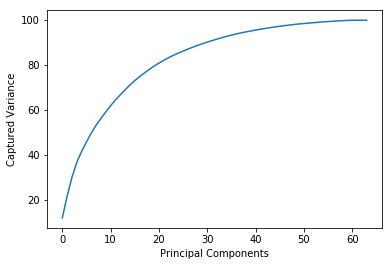

In [21]:
#Q1 Plotting the captured variance with respect to increasing latent dimensionality shown in x label.

plt.plot(variance)
plt.xlabel("Principal Components")
plt.ylabel("Captured Variance")
plt.show()

In [22]:
#Q1 identifying minimum dimension that captures at least 95% variance
#intuitively, from the above chart we can see 95% variance lies somewhere around 40 dimensions or principal components

minimum_dimension=np.where(variance>=95) 
print(minimum_dimension) #the output shows that minimum 39 dimension or principal components is needed to cpture 95% variance 

(array([39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
       56, 57, 58, 59, 60, 61, 62, 63], dtype=int64),)


In [23]:
#Q2 Creating a scatter plot with each of the total rows of X projected onto the first two principal components
pca_2 = PCA(n_components=2).fit_transform(Xnorm)
label_pca = KMeans(n_clusters=10)
pca_pred = label_pca.fit_predict(pca_2)
pca_pred

array([4, 6, 4, ..., 3, 6, 4])

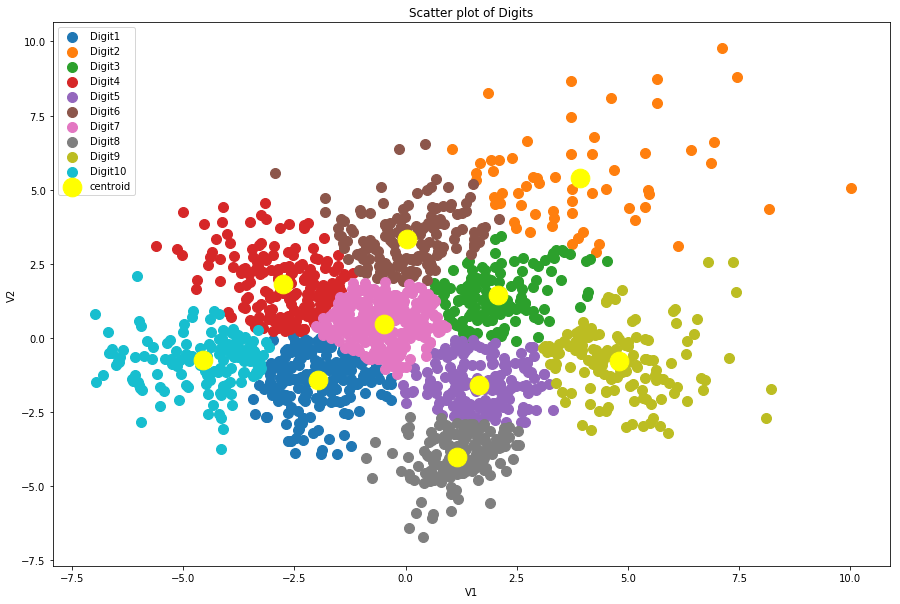

In [25]:
plt.figure(figsize=(15,10))
plt.scatter(Y[pca_pred==0,0], Y[pca_pred==0,1], s=100, label='Digit1')
plt.scatter(Y[pca_pred==1,0], Y[pca_pred==1,1], s=100, label='Digit2')
plt.scatter(Y[pca_pred==2,0], Y[pca_pred==2,1], s=100, label='Digit3')
plt.scatter(Y[pca_pred==3,0], Y[pca_pred==3,1], s=100, label='Digit4')
plt.scatter(Y[pca_pred==4,0], Y[pca_pred==4,1], s=100, label='Digit5')
plt.scatter(Y[pca_pred==5,0], Y[pca_pred==5,1], s=100, label='Digit6')
plt.scatter(Y[pca_pred==6,0], Y[pca_pred==6,1], s=100, label='Digit7')
plt.scatter(Y[pca_pred==7,0], Y[pca_pred==7,1], s=100, label='Digit8')
plt.scatter(Y[pca_pred==8,0], Y[pca_pred==8,1], s=100, label='Digit9')
plt.scatter(Y[pca_pred==9,0], Y[pca_pred==9,1], s=100, label='Digit10')
plt.scatter(label_pca.cluster_centers_[:,0], label_pca.cluster_centers_[:,1],c='yellow', s=350, label='centroid')
plt.legend()
plt.xlabel("V1")
plt.ylabel("V2")
plt.title('Scatter plot of Digits')
plt.show()